In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
df = pd.read_csv('Walmart.csv', sep = ',')

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
dicio =  {0: 'Não Feriado', 1:'Feriado'}

df['Feriado'] = df['Holiday_Flag'].map(dicio)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Feriado
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Não Feriado
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Feriado
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Não Feriado
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Não Feriado
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Não Feriado


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [64]:
df.groupby('Store')['Weekly_Sales'].mean()

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [93]:
# Qual o preço médio de venda semanal por loja?

fig = px.scatter(df, x='Store', y='Weekly_Sales')

fig.update_layout(title_text = 'Média de Vendas Semanal Por Loja', title_font_size = 25)

fig.show()


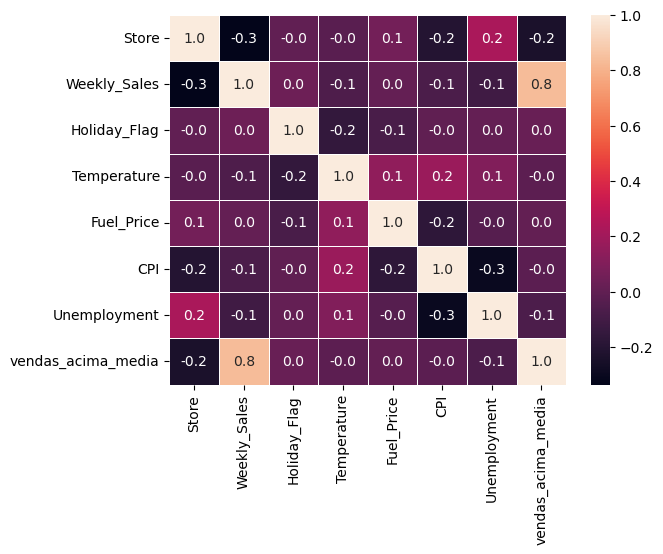

In [63]:
# Correlação das Variaveis

correlation = df.corr()

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


In [60]:
# Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

# Calcula a venda acumulada de cada loja
vendas_acumuladas = df.groupby('Store')['Weekly_Sales'].sum()

# Identifica a loja com a maior venda acumulada
loja_maior_venda = vendas_acumuladas.idxmax()

# Calcula a média de vendas semanais do período
media_vendas_periodo = df['Weekly_Sales'].mean()

# Calcula o número de semanas em que as vendas da loja escolhida ultrapassaram a média do período
vendas_loja_maior = df[df['Store'] == loja_maior_venda]['Weekly_Sales']
semanas_acima_da_media = (vendas_loja_maior > media_vendas_periodo).sum()

print(f"A loja com maior venda acumulada ({loja_maior_venda}) ultrapassou a média do período em {semanas_acima_da_media} semanas.")


A loja com maior venda acumulada (20) ultrapassou a média do período em 143 semanas.


In [8]:
#Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. 
#Ressalte de alguma forma, o período de feriados mencionados acima.




# Converter a coluna 'Data' para o formato de data
df['Date'] = pd.to_datetime(df['Date'])

# Calcular as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo
df_grouped = df.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])

# Criar um trace para as vendas máximas
trace_max = go.Scatter(
    x=df_grouped.index,
    y=df_grouped['max'],
    mode='lines',
    name='Vendas Máximas'
)

# Criar um trace para as vendas mínimas
trace_min = go.Scatter(
    x=df_grouped.index,
    y=df_grouped['min'],
    mode='lines',
    name='Vendas Mínimas'
)

# Criar um trace para as vendas médias
trace_mean = go.Scatter(
    x=df_grouped.index,
    y=df_grouped['mean'],
    mode='lines',
    name='Vendas Médias'
)

# Criar um trace para destacar o período de feriados
trace_holidays = go.Scatter(
    x=['2010-02-12', '2011-02-11', '2012-02-10','2012-09-10', '2011-09-11', '2012-09-07','2010-12-31', '2011-12-30', '2012-12-28','2010-11-26', '2011-11-25', '2012-11-23'],
    y=[df_grouped['max'].max()]*9,
    mode='markers',
    marker=dict(size=15, color='red'),
    name='Feriados'
)

# Criar um layout para o gráfico
layout = go.Layout(
    title='Vendas de todas as lojas',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Vendas')
)

# Criar a figura com os traces e o layout
fig = go.Figure(data=[trace_max, trace_min, trace_mean, trace_holidays], layout=layout)

# Exibir o gráfico
fig.show()

In [54]:
# Pensando na expansão de uma das lojas, que loja você escolheria e o por que?
# A loja com maior venda acumulada (20) ultrapassou a média do período em 143 semanas.
